In [96]:
%cd "/Volumes/passport/Present/Work/SpaceLabWork/north_pole/NP_EKM0_TBS0_KP"

/Volumes/passport/Present/Work/SpaceLabWork/north_pole/NP_EKM0_TBS0_KP


In [97]:
import os
import numpy as np
import xarray as xr
import proplot as plot 
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.signal
import astropy.nddata

In [122]:
def reshapefile(filename, indexname='data', amountofindex=7):
    """this function takes a variable inside your file location and creates a reshaped array (257,257). (if the data you wish to use is not in the same file, you must specify file path)
    amountofindex variable is set to 7 automatically, but can be changed to any amount of indices
    
    filename- filepath
    
    indexname- name of each index title
    
    amountofindex- how many indices your data has (starts at 0)
    
    not needed but helpful (?) make sure to add a #variablename to remember what you called your data
    ex: 
        reshapefile('NP_EKM0_TBS0_KP_01.dat') #data
    
    """
    a= pd.read_csv( filename, sep=' ', header=None, skipinitialspace=True, engine='python')
    b=np.array(a)
    i=0
    while i <= amountofindex:
    #npdata2= npdata2[:,i]
    #print('hi')
        globals()[indexname + str(i)]= np.reshape(b[:,i], (257,257))
        i+= 1
    
    

In [123]:
reshapefile('NP_EKM0_TBS0_KP_01.dat')

In [124]:
a= scipy.signal.decimate(data1,15, axis=1)
b=scipy.signal.decimate(data2,15, axis=1)

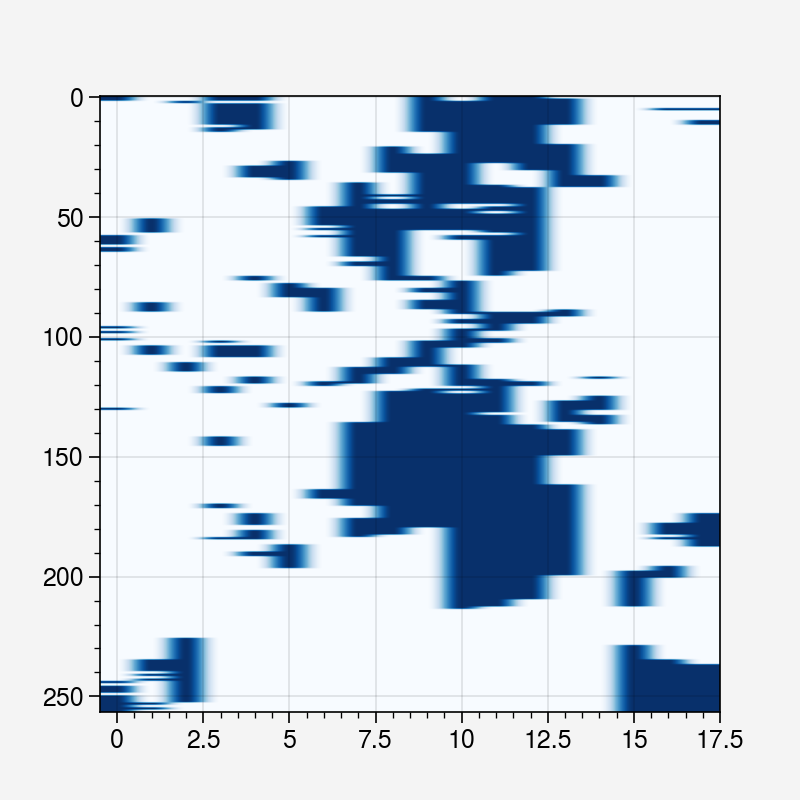

In [125]:
data = a-b> b
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data, aspect='auto', cmap="Blues")#, interpolation='nearest')

In [167]:
q= astropy.nddata.block_reduce(data1,block_size=(13,13))#,func=np.mean)
r=astropy.nddata.block_reduce(data2,block_size=(13,13))#,func=np.mean)

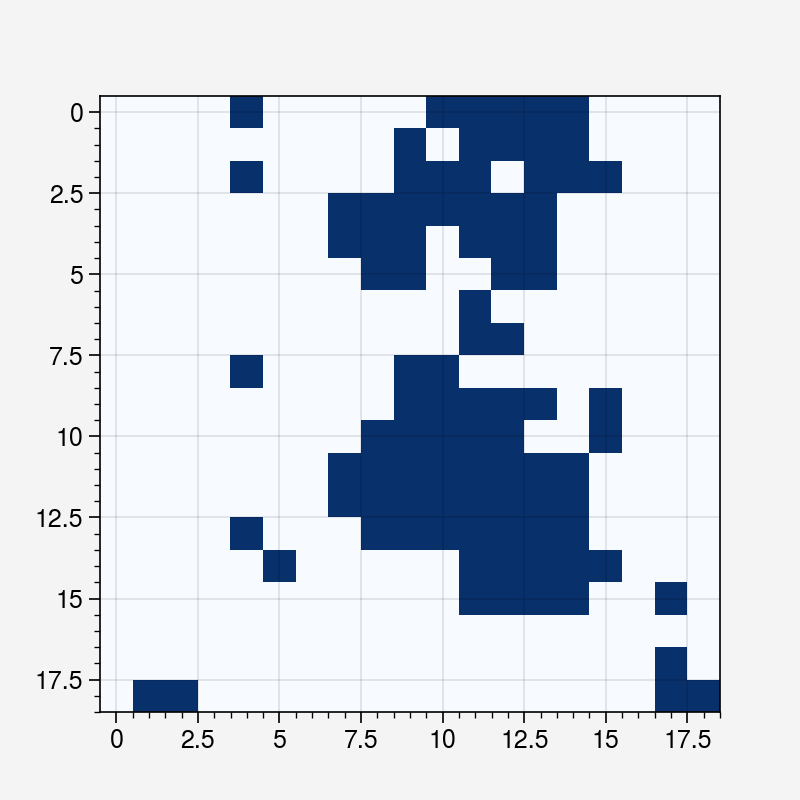

In [168]:
test_data_test= q-r>r
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(test_data_test, aspect='auto', cmap="Blues")#, interpolation='nearest')

In [129]:
data1.shape

(257, 257)

<h1> NOT USEFUL

In [130]:
b = np.arange(0,100)
c = b.reshape([10,10])
print(c[::3,::3])

[[ 0  3  6  9]
 [30 33 36 39]
 [60 63 66 69]
 [90 93 96 99]]


In [140]:
f= data1[::15,::15]
g= data2[::15,::15]

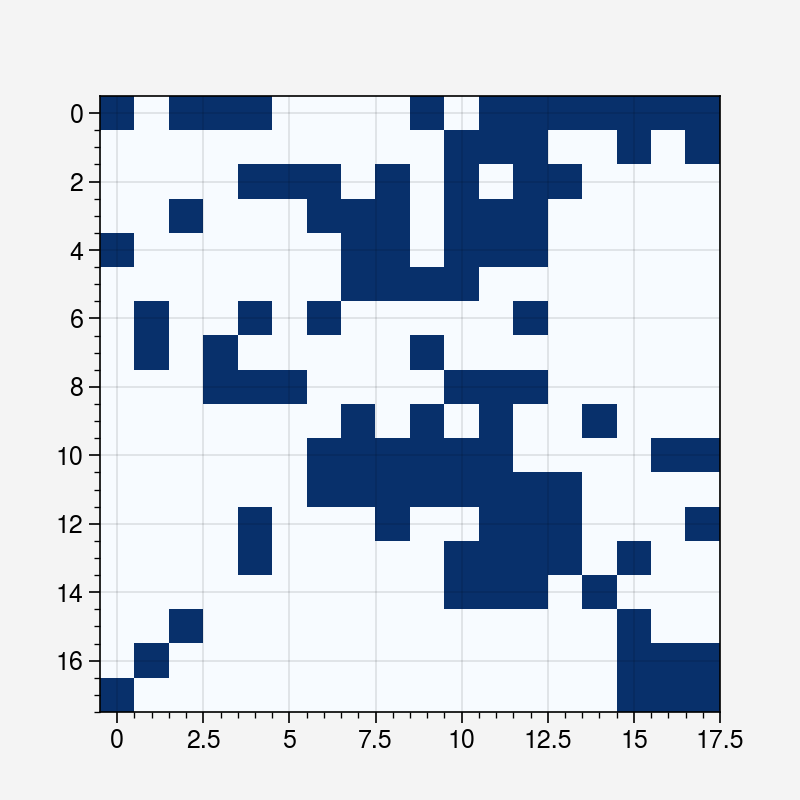

In [141]:
data_test= f-g>g
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data_test, aspect='auto', cmap="Blues")#, interpolation='nearest')